In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from scipy import stats
import pandas as pd
import pickle
import copy
from pathlib import Path
import sys
import os
import csv

%matplotlib inline

In [2]:
basepath = '/home/kyoko/デスクトップ/Develop/ActualCausation/MABE/MABE_contents/'# basepath

#path = os.path.join(basepath,'actual_agency')
path = os.path.join(basepath,'actual_agency') #actualagency
print(path)
sys.path.append(path)

from pyanimats import *
from pyTPM import *
import actual_agency as agency

path = os.path.join('/home/kyoko/.anyenv/envs/pyenv/versions/anaconda3-5.1.0/envs/pyphikit/lib/python3.6/site-packages/pyphi') #pyphi
print(path)
sys.path.append(path)

import pyphi
from pyphi import actual, config, Direction

/home/kyoko/デスクトップ/Develop/ActualCausation/MABE/MABE_contents/actual_agency
/home/kyoko/.anyenv/envs/pyenv/versions/anaconda3-5.1.0/envs/pyphikit/lib/python3.6/site-packages/pyphi


In [3]:
%load_ext autoreload
%autoreload 2
%aimport pyTPM, pyanimats, actual_agency

# Lets inspect the fitness of the animats

In [4]:
# First, tell the computer where to look for files
basepath = '/home/kyoko/デスクトップ/Develop/ActualCausation/MABE/MABE_contents/Experiments/'#bathpath of MABE


In [5]:
# Get Line-of-descent (LOD) data from MABE output
path = os.path.join(basepath,'190819_1_7') #name of experiment
with open(os.path.join(path,'190819_17_LOD_data.pkl'),'rb') as f:
    LOD_data_1 = pickle.load(f)
path = os.path.join(basepath,'test_4to1') #name of experiment
with open(os.path.join(path,'test4to1_LOD_data.pkl'),'rb') as f:
    LOD_data_4 = pickle.load(f)
path = os.path.join(basepath,'test_4to2') #name of experiment
with open(os.path.join(path,'test4to2_LOD_data.pkl'),'rb') as f:
    LOD_data_2 = pickle.load(f)


In [6]:
# add fitness to the LOD data structure
n_runs = 10
for n in range(n_runs):
    LOD_data_1[n]['fitness'] = (LOD_data_1[n]['correct_AVE']
                               /(LOD_data_1[n]['correct_AVE']+LOD_data_1[n]['incorrect_AVE']))


In [7]:
LOD_data_4

[   update  timeToCoalescence  ID  Simple_numOffspring  alive  correct_AVE  \
 0       0                  1   0                    1      1         62.0   
 
    correct_LIST  countCopy  countDelete  countIndel  ...  incorrect_AVE  \
 0            62          0            0           0  ...            2.0   
 
    incorrect_LIST  markovBrainDeterministicGates  markovBrainGates  \
 0              2,                              4                 4   
 
   markovBrain_nextNodesConnections_LIST  markovBrain_nodesConnections_LIST  \
 0                   1,0,0,1,1,1,0,1,2,2                3,2,0,0,0,2,0,1,4,1   
 
    optimizeValue  score_AVE score_LIST  timeOfBirth  
 0      18.679186  18.679186  18.679186           -1  
 
 [1 rows x 23 columns]]

In [8]:
# inspect the LOD data for a specific LOD (run)
run = 1
LOD_data_1[run]

,update,timeToCoalescence,ID,Simple_numOffspring,alive,correct_AVE,correct_LIST,countCopy,countDelete,countIndel,...,incorrect_LIST,markovBrainDeterministicGates,markovBrainGates,markovBrain_nextNodesConnections_LIST,markovBrain_nodesConnections_LIST,optimizeValue,score_AVE,score_LIST,timeOfBirth,fitness
0,0,0,67,3,1,31.0,31,0,0,0,...,33,2,2,"0,1,0,0,1,2,0,0,1,2","3,1,0,0,0,0,0,0,0,1",0.907029,0.907029,0.907029,-1,0.484375
1,500,0,50081,1,1,44.0,44,130,114,0,...,20,3,3,"1,1,0,1,1,2,2,0,0,0","2,2,1,1,0,0,2,0,0,0",3.225100,3.225100,3.225100,499,0.687500
2,1000,0,100068,2,1,54.0,54,204,195,0,...,10,4,4,"0,2,0,0,1,1,2,0,2,1","1,5,0,2,1,0,2,0,1,0",8.557150,8.557150,8.557150,999,0.843750
3,1500,0,150072,4,1,54.0,54,320,296,0,...,10,3,3,"1,1,1,0,1,1,2,0,1,1","1,4,0,0,0,0,1,0,2,0",8.557150,8.557150,8.557150,1499,0.843750
4,2000,0,200033,2,1,57.0,57,485,459,0,...,"7,",5,5,"1,1,1,0,1,2,2,0,1,1","2,5,0,0,0,1,2,0,3,2",11.467400,11.467400,11.467400,1999,0.890625
5,2500,0,250071,3,1,59.0,59,664,627,0,...,"5,",3,3,"0,0,1,1,1,1,1,0,1,2","1,4,0,0,0,0,1,0,2,1",13.938696,13.938696,13.938696,2499,0.921875
6,3000,0,300049,3,1,61.0,61,826,811,0,...,"3,",4,4,"0,1,2,0,2,2,1,0,1,1","1,4,0,0,0,0,3,0,2,1",16.942572,16.942572,16.942572,2999,0.953125
7,3500,0,350025,2,1,61.0,61,966,944,0,...,"3,",4,4,"0,1,4,1,2,2,1,0,1,1","1,4,0,0,0,0,3,0,2,1",16.942572,16.942572,16.942572,3499,0.953125
8,4000,0,400018,3,1,61.0,61,1124,1116,0,...,"3,",3,3,"0,0,0,0,1,1,1,1,1,1","1,3,0,0,0,1,2,0,2,1",16.942572,16.942572,16.942572,3999,0.953125
9,4500,0,450014,4,1,61.0,61,1279,1276,0,...,"3,",3,3,"0,0,0,0,1,1,1,1,1,1","1,3,0,1,0,1,2,0,2,1",16.942572,16.942572,16.942572,4499,0.953125


In [9]:
LOD_data_4[0]['fitness'] = (LOD_data_4[0]['correct_AVE'])/(LOD_data_4[0]['correct_AVE'] + LOD_data_4[0]['incorrect_AVE'])
LOD_data_4[0]['fitness']

0    0.96875
Name: fitness, dtype: float64

In [10]:
LOD_data_2[0]['fitness'] = (LOD_data_2[0]['correct_AVE'])/(LOD_data_2[0]['correct_AVE'] + LOD_data_2[0]['incorrect_AVE'])
LOD_data_2[0]['fitness']

0    1.0
Name: fitness, dtype: float64

In [11]:
for i in range(10):    
    print(LOD_data_1[i]['fitness'][60])

0.96875
0.984375
1.0
1.0
0.984375
0.96875
0.796875
1.0
0.953125
1.0


In [12]:
#for i in range(10):
#    plt.plot(LOD_data_1[i]['fitness'])


In [13]:
x_1 = LOD_data_1[0]['update']
y_1 = [LOD_data_1[i]['fitness'] for i in range(10)]

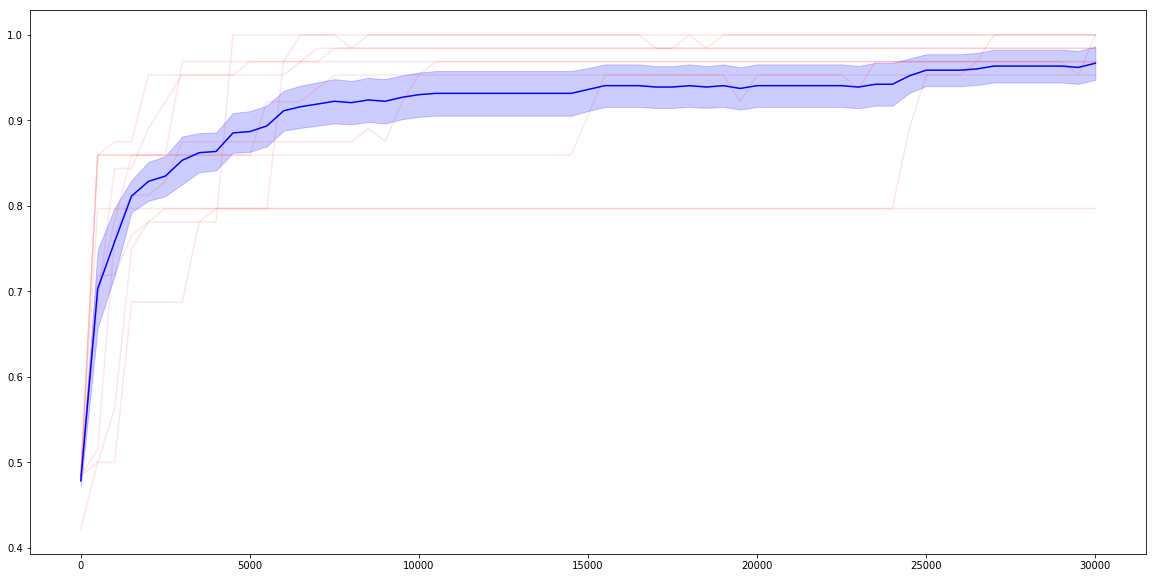

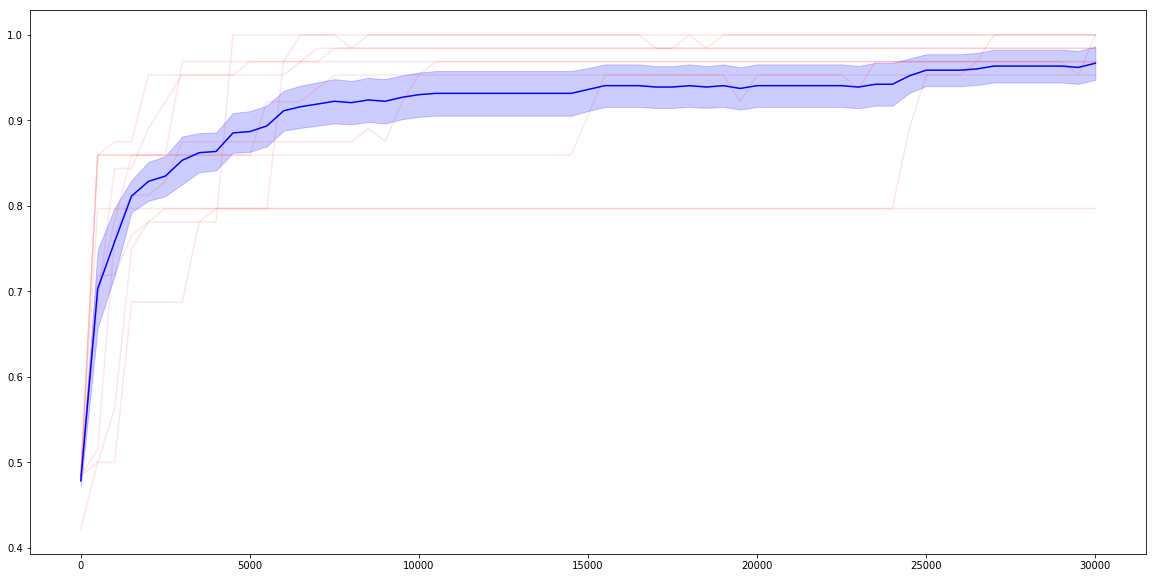

In [14]:
# Let's plot the fitness  plt.plot()

agency.plot_LODdata_and_Bootstrap(x_1, y_1, label=['1_fitness']) # normal

In [15]:
# inspect the fitness of a specific LOD (run)
heading = 'fitness'
LOD_data_1[run][heading][:]

0     0.484375
1     0.687500
2     0.843750
3     0.843750
4     0.890625
5     0.921875
6     0.953125
7     0.953125
8     0.953125
9     0.953125
10    0.953125
11    0.953125
12    0.953125
13    0.968750
14    0.984375
15    0.984375
16    0.984375
17    0.984375
18    0.984375
19    0.984375
20    0.984375
21    0.984375
22    0.984375
23    0.984375
24    0.984375
25    0.984375
26    0.984375
27    0.984375
28    0.984375
29    0.984375
        ...   
31    0.984375
32    0.984375
33    0.984375
34    0.984375
35    0.984375
36    0.984375
37    0.984375
38    0.984375
39    0.984375
40    0.984375
41    0.984375
42    0.984375
43    0.984375
44    0.984375
45    0.984375
46    0.984375
47    0.984375
48    0.984375
49    0.984375
50    0.984375
51    0.984375
52    0.984375
53    0.984375
54    0.984375
55    0.984375
56    0.984375
57    0.984375
58    0.984375
59    0.984375
60    0.984375
Name: fitness, Length: 61, dtype: float64

In [16]:
# and write the values to a new list
n_agents = 61
n_runs = 10
fitness_data = [[LOD_data_1[r][heading][i] for i in range(n_agents)] for r in range(n_runs)]
[print(x) for x in fitness_data]

[0.484375, 0.703125, 0.78125, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.90625, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875]
[0.484375, 0.6875, 0.84375, 0.84375, 0.890625, 0.921875, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.953125, 0.96875, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.9

[None, None, None, None, None, None, None, None, None, None]

# Now let's look at the genome data

In [17]:

# Get the genome from our output
path = os.path.join(basepath,'190819_1_7') #name of experiment
with open(os.path.join(path,'190819_17_genome.pkl'),'rb') as f:
    all_genomes = pickle.load(f)
    


In [18]:
# we can pick the genome of one agent and parse it (make it readable for our scripts) 
run, agent = 0,60
genome = agency.get_genome(all_genomes, run, agent)

# from the genome we can reconstruct the TPM (transition probability matrix) and CM (connectivity matrix)
TPM, TPM_gates, cm = genome2TPM(genome, n_nodes=8, n_sensors=2, n_motors=2, gate_type='deterministic',states_convention='loli',remove_sensor_motor_effects=True)


In [19]:
# then we can inspect the TPM
[print(x) for x in TPM] 

[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 0.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0.  0.  1.  0.  1. ]
[0.5 0.5 1.  0

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [20]:
TPM_gates

[{'type': 'deterministic',
  'ins': array([5, 6]),
  'outs': array([1, 3, 6]),
  'logic': [[0.0, 0.0, 0.0],
   [1.0, 1.0, 1.0],
   [1.0, 1.0, 1.0],
   [1.0, 1.0, 1.0]]},
 {'type': 'deterministic',
  'ins': array([5, 6, 4, 3]),
  'outs': array([2]),
  'logic': [[0.0],
   [0.0],
   [0.0],
   [1.0],
   [1.0],
   [0.0],
   [1.0],
   [0.0],
   [0.0],
   [1.0],
   [0.0],
   [0.0],
   [0.0],
   [1.0],
   [0.0],
   [0.0]]},
 {'type': 'deterministic',
  'ins': array([3, 6]),
  'outs': array([4, 5, 7]),
  'logic': [[0.0, 1.0, 1.0],
   [0.0, 0.0, 0.0],
   [1.0, 0.0, 0.0],
   [0.0, 1.0, 0.0]]},
 {'type': 'deterministic',
  'ins': array([5, 6, 4, 3]),
  'outs': array([2]),
  'logic': [[0.0],
   [0.0],
   [0.0],
   [1.0],
   [1.0],
   [0.0],
   [1.0],
   [1.0],
   [0.0],
   [0.0],
   [1.0],
   [0.0],
   [0.0],
   [1.0],
   [1.0],
   [1.0]]}]

In [21]:
# and also the connectivity matrix (CM)
print(cm)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


# Last part of the output is the activity pattern

In [22]:
# First get the data from our MABE output
with open(os.path.join(path,'190819_17_activity.pkl'),'rb') as f:
    activity = pickle.load(f)
    

In [23]:
# reformat the activity to a single list for each trial
brain_activity = []
for r in range(n_runs):
    brain_activity.append(agency.getBrainActivity(activity[r], n_agents))

Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...


In [24]:
# inspect activity for a given run, agent, and trial
run = 0
agent = 60
trial = 2
print(brain_activity[run][agent][trial])

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 1.]]


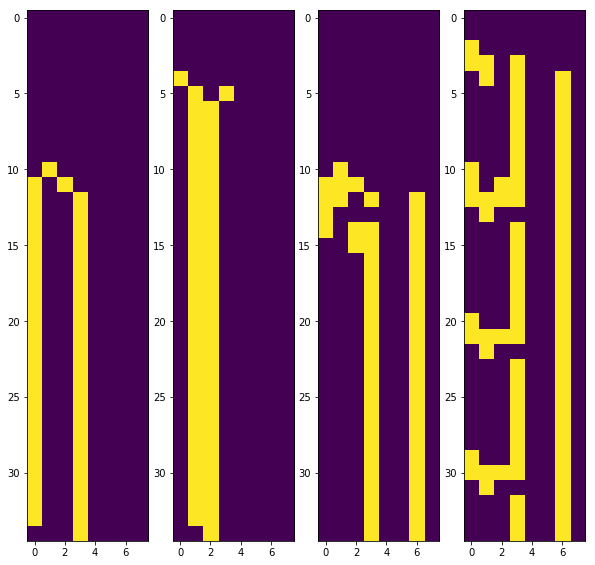

In [25]:
run, agent, wait = 0,20,4
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.imshow(brain_activity[run][agent][0+wait])
plt.subplot(1,4,2)
plt.imshow(brain_activity[run][agent][16+wait])
plt.subplot(1,4,3)
plt.imshow(brain_activity[run][agent][32+wait])
plt.subplot(1,4,4)
plt.imshow(brain_activity[run][agent][48+wait])

# The next step is doing some actual causation analysis

In [26]:
# let's analyse the actual causes of the motor occurences for the animat in one trial
run, agent, trial, occ = 0, 20, 52, 15

# First we can inspect the occurrences
X,Y = agency.get_occurrences(np.array(brain_activity[run][agent]),numSensors=2,numHidden=4,numMotors=2)
print('transition from {} to {}'.format(X[trial][occ],Y[trial][occ]))

transition from [0. 0. 0. 0. 0. 0. 1. 0.] to [0. 0. 0. 1. 0. 0. 1. 0.]


In [27]:
# to actually do the AC analysis we must first define a network for pyphi
network = pyphi.network.Network(np.array(TPM), cm=np.array(cm), 
            node_labels=('S1','S2','M1','M2','H1','H2','H3','H4'), purview_cache=None)


In [28]:
print(network)

Network([[[[[[[[[0.5 0.5 0.  ... 1.  0.  1. ]
        [0.5 0.5 0.  ... 1.  0.  1. ]]

       [[0.5 0.5 0.  ... 0.  1.  0. ]
        [0.5 0.5 0.  ... 0.  1.  0. ]]]


      [[[0.5 0.5 0.  ... 1.  1.  1. ]
        [0.5 0.5 0.  ... 1.  1.  1. ]]

       [[0.5 0.5 1.  ... 0.  1.  0. ]
        [0.5 0.5 1.  ... 0.  1.  0. ]]]]



     [[[[0.5 0.5 1.  ... 1.  0.  1. ]
        [0.5 0.5 1.  ... 1.  0.  1. ]]

       [[0.5 0.5 1.  ... 0.  1.  0. ]
        [0.5 0.5 1.  ... 0.  1.  0. ]]]


      [[[0.5 0.5 0.  ... 1.  1.  1. ]
        [0.5 0.5 0.  ... 1.  1.  1. ]]

       [[0.5 0.5 1.  ... 0.  1.  0. ]
        [0.5 0.5 1.  ... 0.  1.  0. ]]]]]




    [[[[[0.5 0.5 0.  ... 1.  0.  1. ]
        [0.5 0.5 0.  ... 1.  0.  1. ]]

       [[0.5 0.5 0.  ... 0.  1.  0. ]
        [0.5 0.5 0.  ... 0.  1.  0. ]]]


      [[[0.5 0.5 0.  ... 1.  1.  1. ]
        [0.5 0.5 0.  ... 1.  1.  1. ]]

       [[0.5 0.5 1.  ... 0.  1.  0. ]
        [0.5 0.5 1.  ... 0.  1.  0. ]]]]



     [[[[0.5 0.5 1.  ... 1.  0.  1. 

In [29]:
ba = np.array()

TypeError: Required argument 'object' (pos 1) not found

In [ ]:
# now we can run a script for calculating the direct causes of all motor occurrences
purview, alpha, motorstate, transitions, account = agency.AnalyzeTransitions(
            network, brain_activity[run][agent][trial], 
            cause_indices=[0,1,4,5,6,7], effect_indices=[2,3],
            sensor_indices=[0,1], motor_indices=[2,3])


In [ ]:
motorstate

In [ ]:
(brain_activity[run][agent][trial]).shape

In [ ]:
# Now we can inspect the causal account and other output of AC analysis for all unique transitions in the trial!
t = 3
print('transition from {} to {}'.format(transitions[t][0],transitions[t][1]))
print('state of the motors was:')
print(motorstate[t])
print('the indices for the elements in the cause of the higher order occurrence was: ')
print(purview[t])
print('the irreducibility of the higher order cause was:')
print(alpha[t])
print(account[t])


In [ ]:
print(account)

In [ ]:
len(account)